In [3]:
# for rendering Latex

import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

# Using seaborn's style
#plt.style.use('science')
#plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-dark-palette')
#plt.style.use('seaborn-deep')

width = 345

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

In [14]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import os
import random

random.seed(123)
np.random.seed(123)

import sys
sys.path.append('../')

from src.utils import load_data

DATA_DIR = '../data'
BETA_VALUES = np.sort(
    [float(x.split('fermi_')[-1]) for x in os.listdir(DATA_DIR) if x.startswith('fermi')])

print('Beta values:',len(BETA_VALUES))

Beta values: 30


(1200000, 64) (200000, 64) (40000, 64)


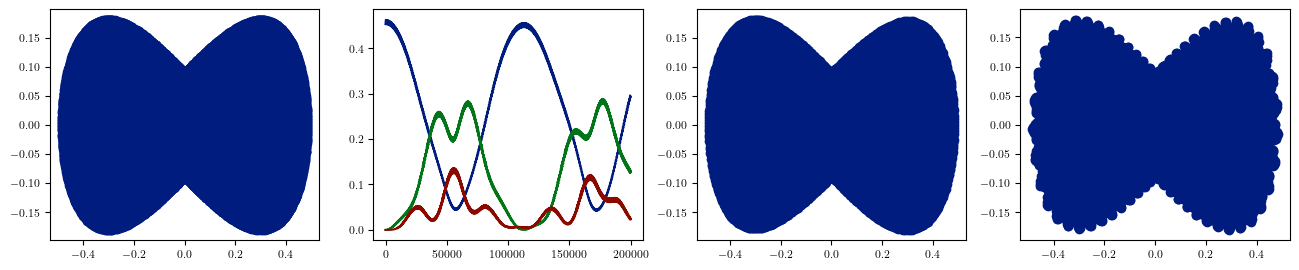

In [28]:
# just for plots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 3))

beta = 1.0
data = load_data(DATA_DIR, beta)
X = data.data_matrix

q, p = X[:, 0], X[:, 32]

ax1.scatter(q, p)
n_portion = 200000

ax2.plot(data.energy_matrix[:,0][:n_portion], linewidth=1.5, label="Mode 1") 
ax2.plot(data.energy_matrix[:,2][:n_portion], linewidth=1.5, label="Mode 1")
ax2.plot(data.energy_matrix[:,4][:n_portion], linewidth=1.5, label="Mode 1")

# take portion of data

X_portion = data.data_matrix[:n_portion]
q_portion, p_portion = X_portion[:, 0], X_portion[:, 32]

ax3.scatter(q_portion, p_portion)

# subsample data
X_subsample = X_portion[0::5]
q_subsample, p_subsample = X_subsample[:, 0], X_subsample[:, 32]

ax4.scatter(q_subsample, p_subsample)

print(X.shape, X_portion.shape, X_subsample.shape)

# Diffusion map

I am going to make diff map plots. Note, I accurtely detemine the portion of data to use by looking at the plots above, for different beta. I.e. I choose n_portion such that the recurrence is observed in the energy plot. <br>

Hyperparams have been manually tuned based on best obtained performance

In [7]:
from pydiffmap import diffusion_map as dm

X_dm = {}

100%|██████████| 28/28 [21:16<00:00, 45.59s/it]


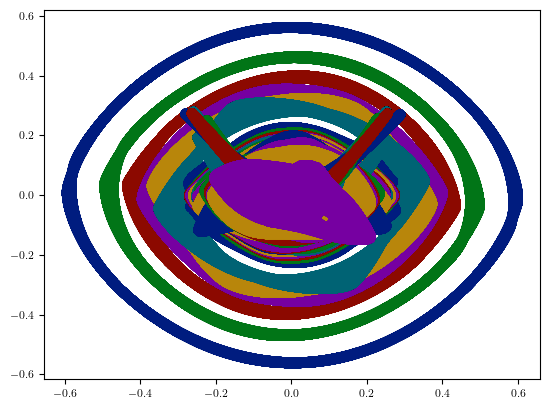

In [13]:
from tqdm import tqdm

for beta in tqdm(BETA_VALUES[2:]):

    data = load_data(DATA_DIR, beta)

    n_portion = 120000
    X_portion = data.data_matrix[:n_portion]

    neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}
    dmap = dm.DiffusionMap.from_sklearn(
        n_evecs=2,
        k=70,
        epsilon=1.0,
        alpha=1.0,
        neighbor_params=neighbor_params
        )

    X_dm[beta] = dmap.fit_transform(X_portion)

In [14]:
import pickle

# pickle.dump(X_dm, open("output/02_diffusion_map/X_dm.pkl", "wb" ) )
# X_dm = pickle.load( open("output/02_diffusion_map/X_dm.pkl", "rb" ) )

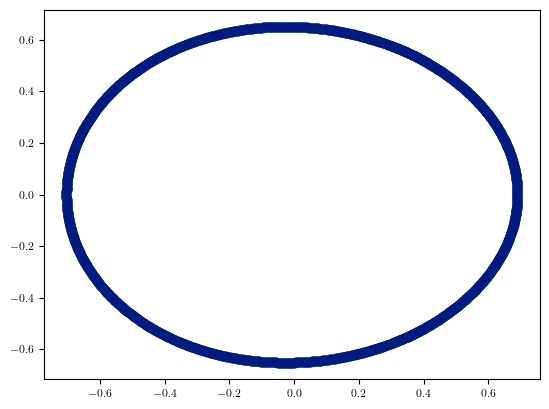

In [6]:
beta = 0.1

data = load_data(DATA_DIR, beta)

n_portion = 2000
X_portion = data.data_matrix[:n_portion]

neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}
dmap = dm.DiffusionMap.from_sklearn(
    n_evecs=2,
    k=70,
    epsilon=1.0,
    alpha=1.0,
    neighbor_params=neighbor_params
    )

X_dm[beta] = dmap.fit_transform(X_portion)

plt.scatter(X_dm[beta][:, 0], X_dm[beta][:, 1])

In [7]:
beta = 1.0

data = load_data(DATA_DIR, beta)

n_portion = 120000
X_portion = data.data_matrix[:n_portion]

neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}
dmap = dm.DiffusionMap.from_sklearn(
    n_evecs=2,
    k=70,
    epsilon=1.0, #'bgh',
    alpha=1.0,
    neighbor_params=neighbor_params
    )

X_dm[beta] = dmap.fit_transform(X_portion)

plt.scatter(X_dm[beta][:, 0], X_dm[beta][:, 1])

KeyboardInterrupt: 

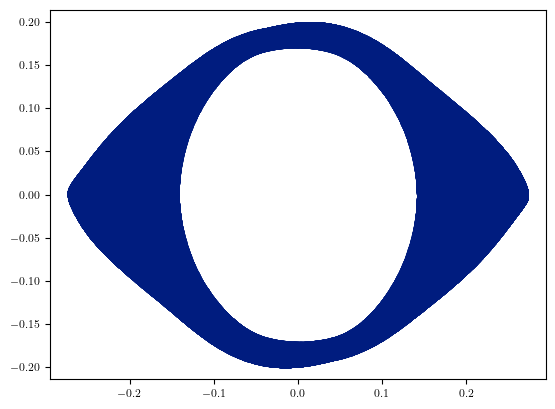

In [ ]:
beta = 1.2

data = load_data(DATA_DIR, beta)

n_portion = 120000
X_portion = data.data_matrix[:n_portion]

neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}
dmap = dm.DiffusionMap.from_sklearn(
    n_evecs=2,
    k=70,
    epsilon=1.0, #'bgh'
    alpha=1.0,
    neighbor_params=neighbor_params
    )

X_dm[beta] = dmap.fit_transform(X_portion)

plt.scatter(X_dm[beta][:, 0], X_dm[beta][:, 1])

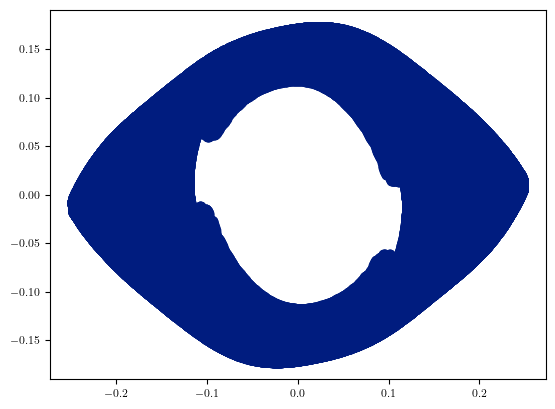

In [ ]:
beta = 1.5

data = load_data(DATA_DIR, beta)

n_portion = 100000
X_portion = data.data_matrix[:n_portion]

neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}
dmap = dm.DiffusionMap.from_sklearn(
    n_evecs=2,
    k=70,
    epsilon=1.0, #'bgh'
    alpha=1.0,
    neighbor_params=neighbor_params
    )

X_dm[beta] = dmap.fit_transform(X_portion)

plt.scatter(X_dm[beta][:, 0], X_dm[beta][:, 1])

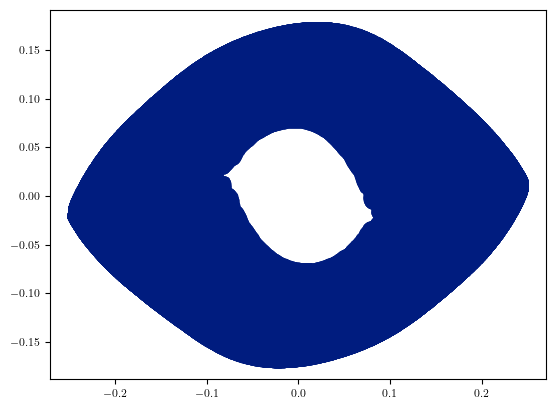

In [13]:
beta = 1.6

data = load_data(DATA_DIR, beta)

n_portion = 300000
X_portion = data.data_matrix[:n_portion]

neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}
dmap = dm.DiffusionMap.from_sklearn(
    n_evecs=2,
    k=70,
    epsilon=1.0,
    alpha=1.0,
    neighbor_params=neighbor_params
    )

X_dm[beta] = dmap.fit_transform(X_portion)

plt.scatter(X_dm[beta][:, 0], X_dm[beta][:, 1])

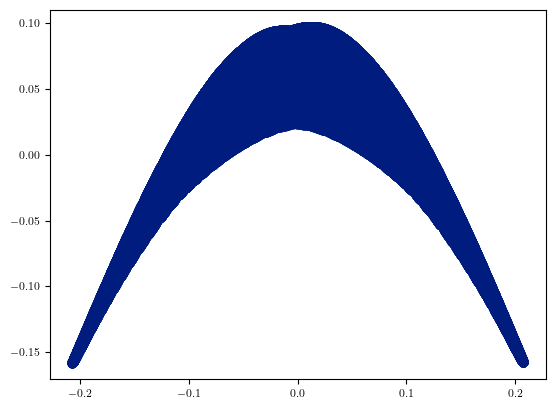

In [9]:
beta = 1.8

data = load_data(DATA_DIR, beta)

n_portion = 120000
X_portion = data.data_matrix[:n_portion]

neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}
dmap = dm.DiffusionMap.from_sklearn(
    n_evecs=2,
    k=100,
    epsilon=1.0, #'bgh'
    alpha=1.0,
    neighbor_params=neighbor_params
    )

X_dm[beta] = dmap.fit_transform(X_portion)

plt.scatter(X_dm[beta][:, 0], X_dm[beta][:, 1])

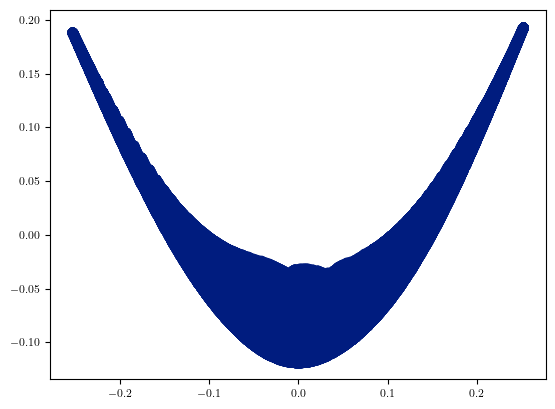

In [15]:
beta = 2.0

data = load_data(DATA_DIR, beta)

n_portion = 120000
X_portion = data.data_matrix[:n_portion]

neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}
dmap = dm.DiffusionMap.from_sklearn(
    n_evecs=2,
    k=70,
    epsilon=1.0, #'bgh'
    alpha=1.0,
    neighbor_params=neighbor_params
    )

X_dm[beta] = dmap.fit_transform(X_portion)

plt.scatter(X_dm[beta][:, 0], X_dm[beta][:, 1])

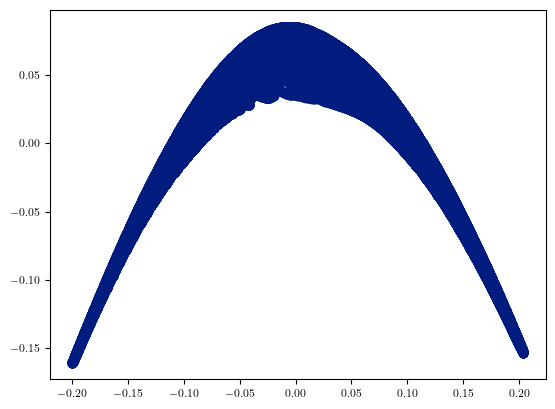

In [17]:
beta = 2.2

data = load_data(DATA_DIR, beta)

n_portion = 120000
X_portion = data.data_matrix[:n_portion]

neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}
dmap = dm.DiffusionMap.from_sklearn(
    n_evecs=2,
    k=100,
    epsilon=1.0, #'bgh'
    alpha=1.0,
    neighbor_params=neighbor_params
    )

X_dm[beta] = dmap.fit_transform(X_portion)

plt.scatter(X_dm[beta][:, 0], X_dm[beta][:, 1])

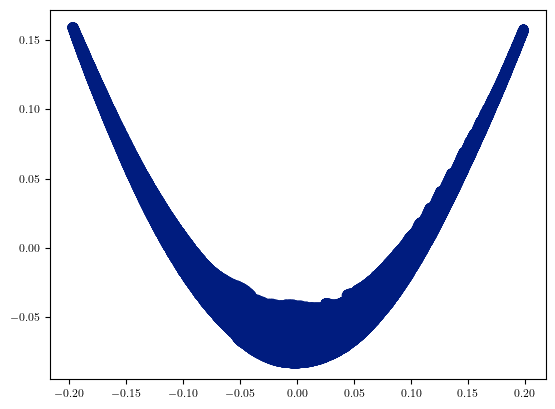

In [18]:
beta = 2.4

data = load_data(DATA_DIR, beta)

n_portion = 100000
X_portion = data.data_matrix[:n_portion]

neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}
dmap = dm.DiffusionMap.from_sklearn(
    n_evecs=2,
    k=100,
    epsilon=1.0, #'bgh'
    alpha=1.0,
    neighbor_params=neighbor_params
    )

X_dm[beta] = dmap.fit_transform(X_portion)

plt.scatter(X_dm[beta][:, 0], X_dm[beta][:, 1])

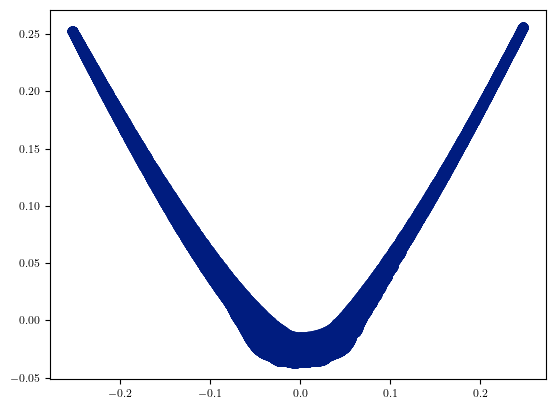

In [19]:
beta = 2.6

data = load_data(DATA_DIR, beta)

n_portion = 100000
X_portion = data.data_matrix[:n_portion]

neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}
dmap = dm.DiffusionMap.from_sklearn(
    n_evecs=2,
    k=100,
    epsilon=1.0, #'bgh'
    alpha=1.0,
    neighbor_params=neighbor_params
    )

X_dm[beta] = dmap.fit_transform(X_portion)

plt.scatter(X_dm[beta][:, 0], X_dm[beta][:, 1])

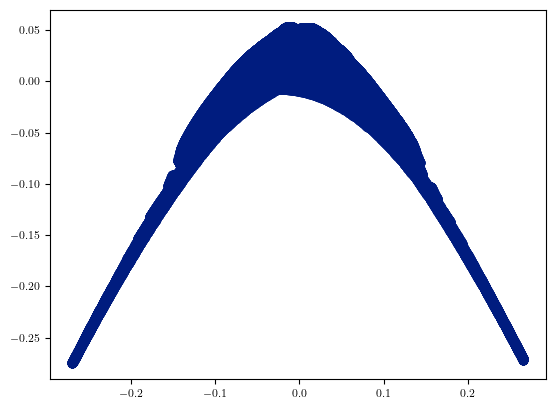

In [ ]:
beta = 2.8

data = load_data(DATA_DIR, beta)

n_portion = 100000
X_portion = data.data_matrix[:n_portion]

neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}
dmap = dm.DiffusionMap.from_sklearn(
    n_evecs=2,
    k=70,
    epsilon=1.0, #'bgh'
    alpha=1.0,
    neighbor_params=neighbor_params
    )

X_dm[beta] = dmap.fit_transform(X_portion)

plt.scatter(X_dm[beta][:, 0], X_dm[beta][:, 1])

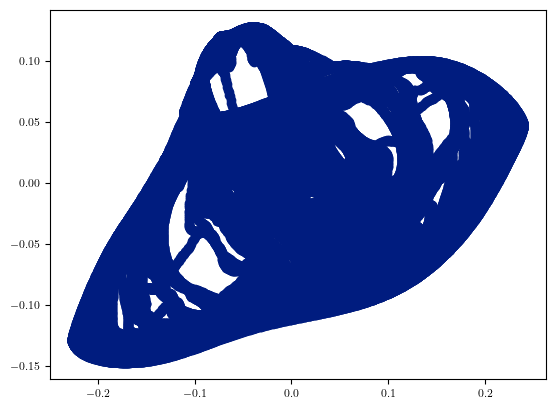

In [ ]:
beta = 3.0

data = load_data(DATA_DIR, beta)

n_portion = 100000
X_portion = data.data_matrix[:n_portion]

neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}
dmap = dm.DiffusionMap.from_sklearn(
    n_evecs=2,
    k=70,
    epsilon=1.0, #'bgh'
    alpha=1.0,
    neighbor_params=neighbor_params
    )

X_dm[beta] = dmap.fit_transform(X_portion)

plt.scatter(X_dm[beta][:, 0], X_dm[beta][:, 1])

In [42]:
# from pydiffmap.visualization import embedding_plot
# from pydiffmap.visualization import embedding_plot, data_plot

# embedding_plot(dmap, scatter_kwargs = {'c': X_dm[:,0], 'cmap': None})

# 'Embedding given by first two DCs'

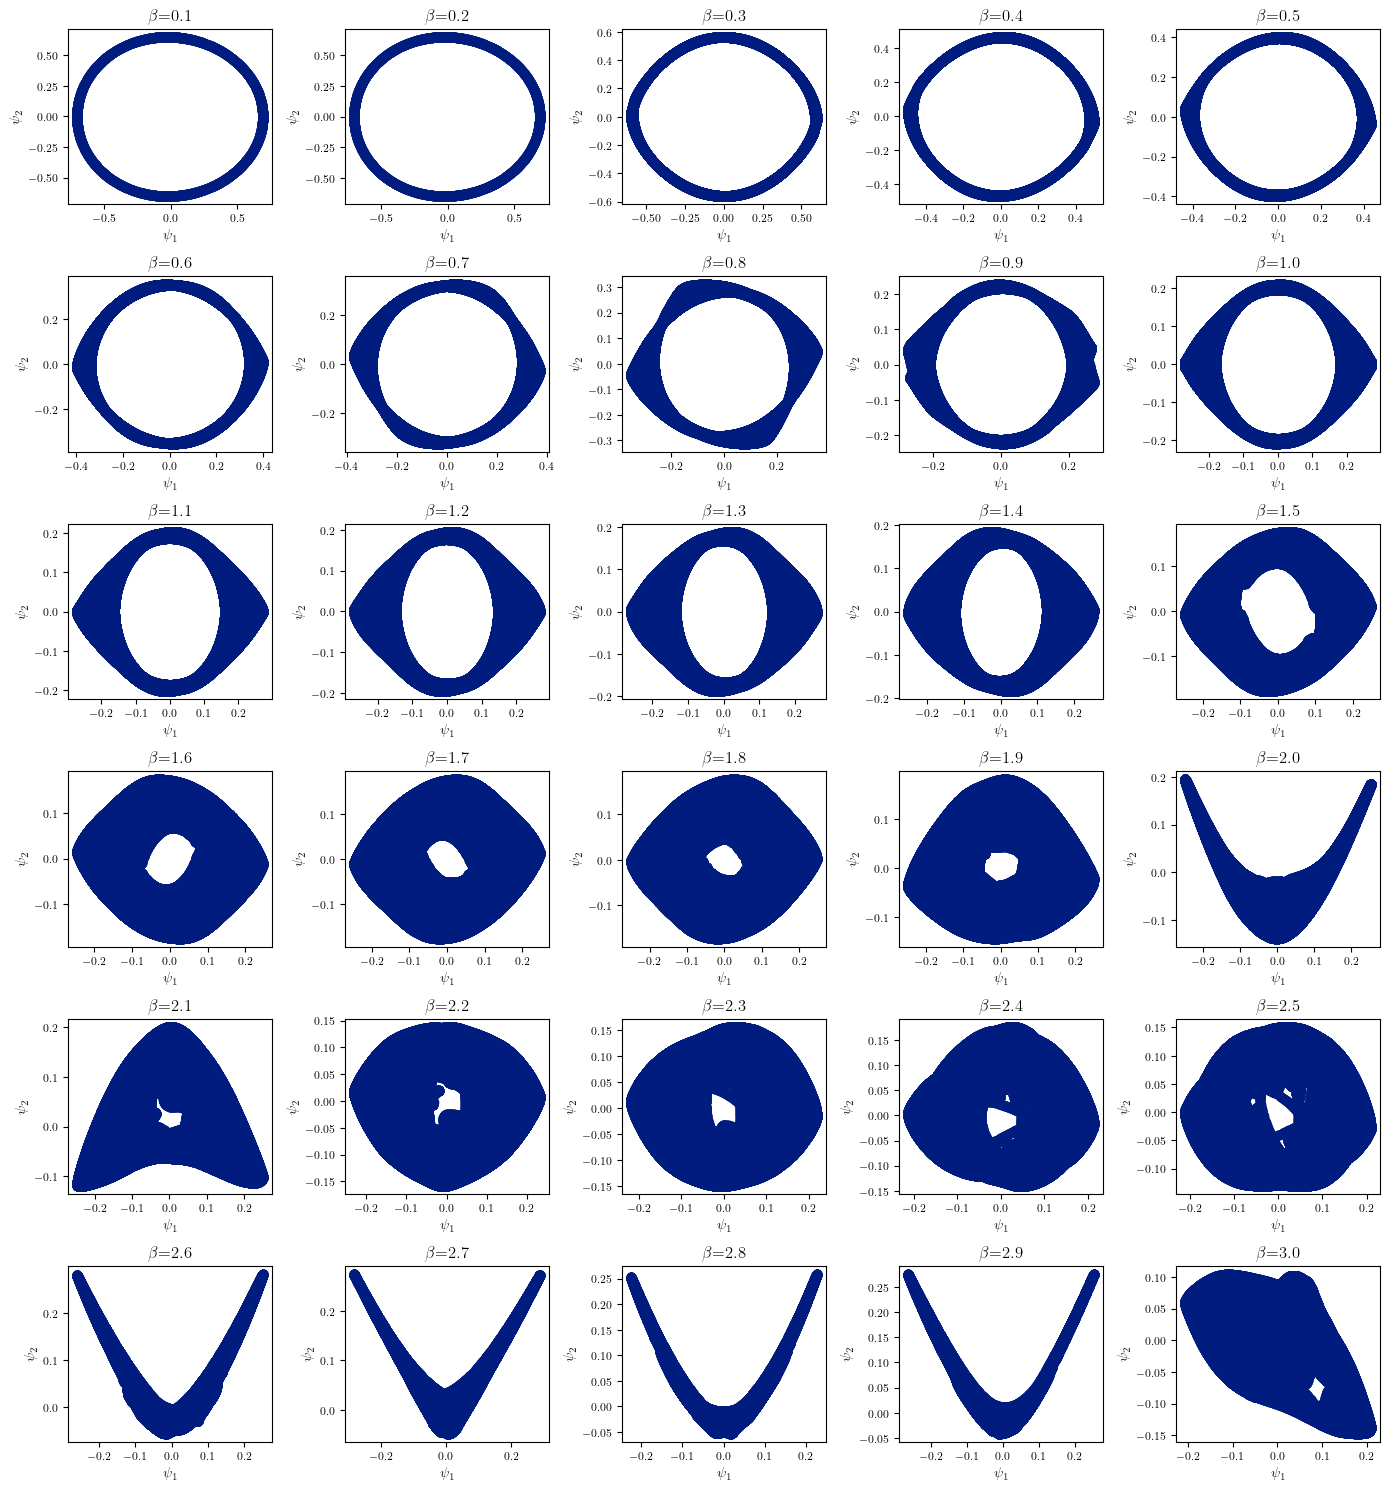

In [26]:
# 'Embedding given by first two DCs'
 
fig, axs = plt.subplots(6, 5, figsize=(14, 15))

for beta, ax in zip(BETA_VALUES, axs.flat):
    ax.scatter(X_dm[beta][:, 0], X_dm[beta][:, 1])
    ax.set_xlabel(r'$\psi_1$')
    ax.set_ylabel(r'$\psi_2$')
    ax.set_title(rf'$\beta$={beta}')

plt.tight_layout()
# plt.savefig("output/02_diffusion_map/diffusion_map_betas.png", dpi=400)